## **Presented By:** 
### - Azzouzi Ousssama Abderraouf
### - Mohamed Saadi

# ===============================================================

# 1- Imports

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV



# 2- loading datasets

In [ ]:
data_path = '011/text_data/'

ada_joy = data_path + 'ada_joy.csv'
gaze_positions = data_path + 'gaze_positions.csv'
myo_emg = data_path + 'myo_emg.csv'

ada_joy_df = pd.read_csv(ada_joy)
gaze_positions_df = pd.read_csv(gaze_positions)
myo_emg_df = pd.read_csv(myo_emg)

In [91]:
data_path = '011/text_data/'

ada_joy = data_path + 'ada_joy.csv'
# assistance_info = data_path + 'assistance_info.csv'
gaze_positions = data_path + 'gaze_positions.csv'
# input_info = data_path + 'input_info.csv'
# joint_positions = data_path + 'joint_positions.csv'
myo_emg = data_path + 'myo_emg.csv'
# myo_imu = data_path + 'myo_imu.csv'
# myo_ori = data_path + 'myo_ori.csv'
# pupil_cal_eye0 = data_path + 'pupil_cal_eye0.csv'
# pupil_cal_eye1 = data_path + 'pupil_cal_eye1.csv'
# pupil_eye0 = data_path + 'pupil_eye0.csv'
# pupil_eye1 = data_path + 'pupil_eye1.csv'
# robot_position = data_path + 'robot_position.csv'
# world_cal_positions = data_path + 'world_cal_positions.csv'

ada_joy_df = pd.read_csv(ada_joy)
# assistance_info_df = pd.read_csv(assistance_info)
gaze_positions_df = pd.read_csv(gaze_positions)
# input_info_df = pd.read_csv(input_info)
# joint_positions_df = pd.read_csv(joint_positions)
myo_emg_df = pd.read_csv(myo_emg)
# myo_imu_df = pd.read_csv(myo_imu)
# myo_ori_df = pd.read_csv(myo_ori)
# pupil_cal_eye0_df = pd.read_csv(pupil_cal_eye0)
# pupil_cal_eye1_df = pd.read_csv(pupil_cal_eye1)
# pupil_eye0_df = pd.read_csv(pupil_eye0)
# pupil_eye1_df = pd.read_csv(pupil_eye1)
# robot_position_df = pd.read_csv(robot_position)
# world_cal_positions_df = pd.read_csv(world_cal_positions)

# ada_joy_df.head(), assistance_info_df.head(), gaze_positions_df.head(), input_info_df.head(), joint_positions_df.head(), myo_emg_df.head(), myo_imu_df.head(), myo_ori_df.head(), pupil_cal_eye0_df.head(), pupil_cal_eye1_df.head(), pupil_eye0_df.head(), pupil_eye1_df.head(), robot_position_df.head(), world_cal_positions_df.head()



# 3- Data Preprocessing

In [93]:
# Combining datasets based on timestamp (outer join to keep all timestamps)
combined_df = pd.merge(ada_joy_df, gaze_positions_df, on='timestamp', how='outer')
combined_df = pd.merge(combined_df, myo_emg_df, on='timestamp', how='outer')

# Handling missing values (example: fill with mean)
for col in combined_df.columns:
    try:
        combined_df[col] = combined_df[col].astype(float)
    except ValueError:
        print(f"Could not convert column {col} to float")

#  calculating the mean of each numeric column and convert to double
combined_df = combined_df.fillna(combined_df.select_dtypes(include=[np.number]).mean())
combined_df = combined_df.fillna(0)

# Droping the base_data column because it casues problems
combined_df = combined_df.drop(columns=['base_data'])

# mean = combined_df.select_dtypes(include=[np.number]).mean()
mean = combined_df.mean()

mean = mean.astype(float)

# print(mean)  # use dtype instead of type()

# Check for missing values
# print(combined_df.isnull().sum())

# combined_df.head(), 
print(combined_df.columns)

Could not convert column base_data to float
Index(['timestamp', 'world_index_x', 'world_index_corrected_x', 'axes_x',
       'axes_y', 'axes_z', 'buttons_0', 'buttons_1', 'world_index_y',
       'world_index_corrected_y', 'confidence', 'norm_pos_x', 'norm_pos_y',
       'gaze_point_3d_x', 'gaze_point_3d_y', 'gaze_point_3d_z',
       'eye_center0_3d_x', 'eye_center0_3d_y', 'eye_center0_3d_z',
       'gaze_normal0_x', 'gaze_normal0_y', 'gaze_normal0_z',
       'eye_center1_3d_x', 'eye_center1_3d_y', 'eye_center1_3d_z',
       'gaze_normal1_x', 'gaze_normal1_y', 'gaze_normal1_z', 'world_index',
       'world_index_corrected', 'emg0', 'emg1', 'emg2', 'emg3', 'emg4', 'emg5',
       'emg6', 'emg7', 'moving'],
      dtype='object')


In [92]:
# # print the column names of the dataframes
# print('ada_joy_df columns: ', ada_joy_df.columns)
# print('assistance_info_df columns: ', assistance_info_df.columns)
# print('gaze_positions_df columns: ', gaze_positions_df.columns)
# print('input_info_df columns: ', input_info_df.columns)
# print('joint_positions_df columns: ', joint_positions_df.columns)
# print('myo_emg_df columns: ', myo_emg_df.columns)
# print('myo_imu_df columns: ', myo_imu_df.columns)
# print('myo_ori_df columns: ', myo_ori_df.columns)
# print('pupil_cal_eye0_df columns: ', pupil_cal_eye0_df.columns)
# print('pupil_cal_eye1_df columns: ', pupil_cal_eye1_df.columns)
# print('pupil_eye0_df columns: ', pupil_eye0_df.columns)
# print('pupil_eye1_df columns: ', pupil_eye1_df.columns)
# print('robot_position_df columns: ', robot_position_df.columns)
# print('world_cal_positions_df columns: ', world_cal_positions_df.columns)


In [94]:
combined_df.shape

(24141, 39)

In [64]:
moving_df = combined_df.loc[combined_df['moving'] != 0]
moving_df.head()

,timestamp,world_index_x,world_index_corrected_x,axes_x,axes_y,axes_z,buttons_0,buttons_1,world_index_y,world_index_corrected_y,...,world_index_corrected,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7,moving


# 4- Feature Selection

In [65]:
# Assigning the target variable
target_variable = ('gaze_point_3d_x', 'gaze_point_3d_y', 'gaze_point_3d_z')

# Identifying redundant features and drop them 
redundant_features = ['world_index_x', 'world_index_corrected_x', 'world_index_y', 'world_index_corrected_y']
redundant_features = [col for col in redundant_features if col in combined_df.columns]  # Check if columns exist
combined_df = combined_df.drop(columns=redundant_features)

# Selecting features and target variable
features = combined_df.drop(columns=list(target_variable) + ['timestamp'])
target = combined_df[list(target_variable)]

# Checking for highly correlated features and drop if necessary
correlation_matrix = features.corr()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
features = features.drop(columns=to_drop)

# Confirm the selected features and target variable
print("Selected Features:", features.columns)
print("Target Variable:", target_variable)

Selected Features: Index(['axes_x', 'axes_y', 'axes_z', 'buttons_0', 'buttons_1', 'confidence',
       'norm_pos_x', 'norm_pos_y', 'eye_center0_3d_x', 'eye_center0_3d_z',
       'gaze_normal0_y', 'gaze_normal0_z', 'eye_center1_3d_x',
       'eye_center1_3d_y', 'gaze_normal1_x', 'gaze_normal1_y',
       'gaze_normal1_z', 'world_index', 'emg0', 'emg1', 'emg2', 'emg3', 'emg4',
       'emg5', 'emg6', 'emg7', 'moving'],
      dtype='object')
Target Variable: ('gaze_point_3d_x', 'gaze_point_3d_y', 'gaze_point_3d_z')


# 5- Data Splitting

In [66]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Confirming the shapes of the sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training set shape:", y_train.shape)
print("Testing set shape:", y_test.shape)
features

Training set shape: (19312, 27)
Testing set shape: (4829, 27)
Training set shape: (19312, 3)
Testing set shape: (4829, 3)


,axes_x,axes_y,axes_z,buttons_0,buttons_1,confidence,norm_pos_x,norm_pos_y,eye_center0_3d_x,eye_center0_3d_z,...,world_index,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7,moving
0,-0.00,-0.00,-0.00,0.00,0.00,0.96,0.49,0.56,19.89,-20.93,...,1248.53,112.49,236.61,349.20,227.34,156.19,108.91,81.95,91.18,0.00
1,-0.00,-0.00,-0.00,0.00,0.00,0.96,0.49,0.56,19.89,-20.93,...,1248.53,112.49,236.61,349.20,227.34,156.19,108.91,81.95,91.18,0.00
2,-0.00,-0.00,-0.00,0.00,0.00,0.96,0.49,0.56,19.89,-20.93,...,1248.53,112.49,236.61,349.20,227.34,156.19,108.91,81.95,91.18,0.00
3,0.00,-0.00,-0.00,0.00,0.00,0.96,0.49,0.56,19.89,-20.93,...,1248.53,112.49,236.61,349.20,227.34,156.19,108.91,81.95,91.18,0.00
4,0.03,-0.00,-0.00,0.00,0.00,0.96,0.49,0.56,19.89,-20.93,...,1248.53,112.49,236.61,349.20,227.34,156.19,108.91,81.95,91.18,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24136,0.08,0.04,0.01,0.02,0.00,0.96,0.49,0.56,19.89,-20.93,...,2495.00,42.00,144.00,230.00,110.00,50.00,46.00,40.00,31.00,0.00
24137,0.08,0.04,0.01,0.02,0.00,0.96,0.49,0.56,19.89,-20.93,...,2496.00,48.00,142.00,249.00,116.00,47.00,46.00,39.00,33.00,0.00
24138,0.08,0.04,0.01,0.02,0.00,0.96,0.49,0.56,19.89,-20.93,...,2496.00,47.00,132.00,246.00,119.00,50.00,46.00,39.00,33.00,0.00
24139,0.08,0.04,0.01,0.02,0.00,0.96,0.49,0.56,19.89,-20.93,...,2497.00,44.00,133.00,229.00,113.00,48.00,45.00,38.00,31.00,0.00


In [67]:
ada_joy_df.head()

,timestamp,world_index,world_index_corrected,axes_x,axes_y,axes_z,buttons_0,buttons_1
0,5.24,147,156,-0.00,-0.00,-0.00,0,0
1,5.25,147,156,-0.00,-0.00,-0.00,0,0
2,5.26,148,157,-0.00,-0.00,-0.00,0,0
3,5.27,148,157,0.00,-0.00,-0.00,0,0
4,5.28,148,157,0.03,-0.00,-0.00,0,0


# 6- Model Selection, Training and Testing

### **6-A- LinearRegression**

In [85]:
# now we will linear regression model
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# grid search for the linear regression
# Defining the hyperparameters and their values
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_
print(best_model)



Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}
LinearRegression(fit_intercept=False)


Training RMSE: 10.005283812806285
Testing RMSE: 6.75123701209191
Training MSE: 156.22712165097815
Testing MSE: 81.89441179861646
Model Accuracy: 0.8193333150847678


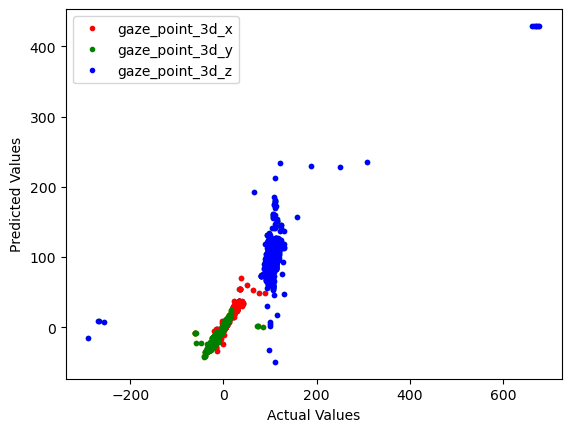

In [86]:
# Train the model
best_model.fit(X_train, y_train)

# Predict on the training set
train_predictions = best_model.predict(X_train)

# Predict on the testing set
test_predictions = best_model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

# get the accuracy of the model
accuracy = best_model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Ploting the actual values vs the predicted values
plt.plot(y_test.to_numpy(), test_predictions, linestyle='none', marker='.')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# We have 3 target variables, so we will plot the actual vs predicted values for each and mention their labels
plt.plot(y_test.iloc[:, 0], test_predictions[:, 0], linestyle='none', marker='.', label='gaze_point_3d_x', color='r')
plt.plot(y_test.iloc[:, 1], test_predictions[:, 1], linestyle='none', marker='.', label='gaze_point_3d_y', color='g')
plt.plot(y_test.iloc[:, 2], test_predictions[:, 2], linestyle='none', marker='.', label='gaze_point_3d_z', color='b')
plt.legend()

plt.show()

### **6-B- DecisionTreeRegressor**

In [87]:
# now we will create same model using decision tree regressor
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
model = DecisionTreeRegressor(random_state=42)

# Defining the hyperparameters and their values
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_
print(best_model)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5, random_state=42)


Training RMSE: 2.143512752485948
Testing RMSE: 3.5256443515242
Training MSE: 5.587582379715568
Testing MSE: 25.652869365554015
Model Accuracy: 0.948860839736029


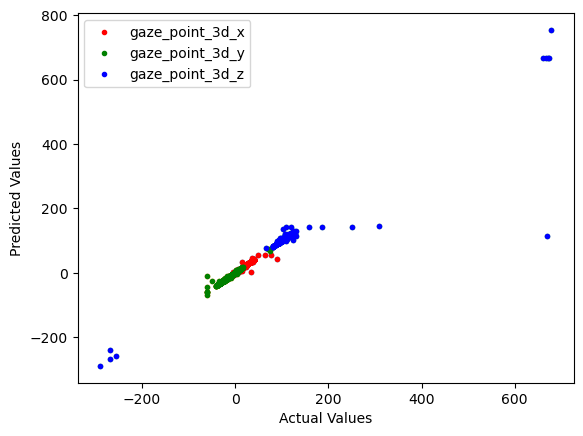

In [88]:
# Train the model
best_model.fit(X_train, y_train)

# Predict on the training set
train_predictions = best_model.predict(X_train)

# Predict on the testing set
test_predictions = best_model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

# get the accuracy of the model
accuracy = best_model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Ploting the actual values vs the predicted values
plt.plot(y_test.to_numpy(), test_predictions, linestyle='none', marker='.')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# We have 3 target variables, so we will plot the actual vs predicted values for each and mention their labels
plt.plot(y_test.iloc[:, 0], test_predictions[:, 0], linestyle='none', marker='.', label='gaze_point_3d_x', color='r')
plt.plot(y_test.iloc[:, 1], test_predictions[:, 1], linestyle='none', marker='.', label='gaze_point_3d_y', color='g')
plt.plot(y_test.iloc[:, 2], test_predictions[:, 2], linestyle='none', marker='.', label='gaze_point_3d_z', color='b')
plt.legend()

plt.show()

### **6-C- RandomForestRegressor**

In [69]:
# creating a grid search for the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Defining the hyperparameters and their values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_
print(best_model)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestRegressor(min_samples_leaf=2, n_estimators=200, random_state=42)


Training RMSE: 3.240902217225743
Testing RMSE: 1.9481518798336301
Training MSE: 14.21836480802842
Testing MSE: 6.457698441756946


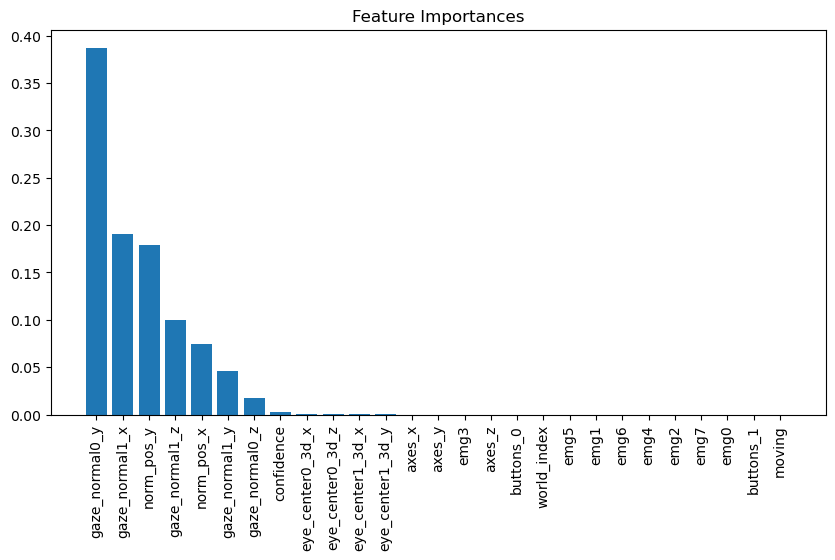

In [73]:
# Train the model
best_model.fit(X_train, y_train)

# Predict on the training set
train_predictions = best_model.predict(X_train)

# Predict on the testing set
test_predictions = best_model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

# Ploting the feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()


Model Accuracy: 0.9840566370158962


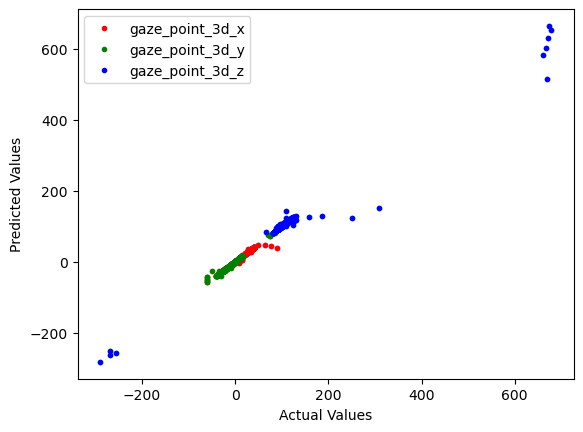

((4829, 3), (4829, 3))

In [78]:
# get the accuracy of the model
accuracy = best_model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# testing the model

# # Ploting the actual values vs the predicted values
plt.plot(y_test.to_numpy(), test_predictions, linestyle='none', marker='.')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# We have 3 target variables, so we will plot the actual vs predicted values for each and mention their labels
plt.plot(y_test.iloc[:, 0], test_predictions[:, 0], linestyle='none', marker='.', label='gaze_point_3d_x', color='r')
plt.plot(y_test.iloc[:, 1], test_predictions[:, 1], linestyle='none', marker='.', label='gaze_point_3d_y', color='g')
plt.plot(y_test.iloc[:, 2], test_predictions[:, 2], linestyle='none', marker='.', label='gaze_point_3d_z', color='b')
plt.legend()

plt.show()

y_test.shape, test_predictions.shape

In [ ]:
# Models ranking
# 1- Random Forest Regressor with an accuracy of 0.9840566370158962
# 2- Decision Tree Regressor with an accuracy of 0.948860839736029
# 3- Linear Regression with an accuracy of 0.8193333150847678